### Testing how well different MatrixSSL variations do feature learning
In this notebook, we test three MatrixSSL losses: the MCE loss implemented by authors of the paper, the expected frobenius norm difference of the covariance of embeddings (mean_norm_diff), and the frobenius norm of the expected difference between covariance of embeddings (norm_mean_diff).


In [1]:
!pwd

/Users/admin/Documents/Research/SSL/matrixssl-inductive/notebooks


In [2]:
# imports
import sys
import os

SCRIPT_DIR = os.path.dirname(os.path.abspath(''))
sys.path.append(SCRIPT_DIR)

import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.distributions import MultivariateNormal

from utils import show_weights, plot_metrics, plot_embeddings, generate_aug_from_bool_aug, fit_classifiers, evaluate_classifiers, evaluate_normal_downstream, get_feature_downstream_scores
from data.loader import generate_cube_augs
from IPython.display import clear_output


os.chdir('..')

In [3]:
!pwd

/Users/admin/Documents/Research/SSL/matrixssl-inductive


## Normal Augmentations 
i.e concatenated features, drawn from normal distribution with mean 0, covariance identity, but features across positive pairs are correlated along a single dimension $vv^\top$. Can check by using testing classification with each feature

### MCE Loss

In [5]:
dir1 = "./outputs/normal/mce_runs/mssla_linear_sgd_emb_dim=5_aug=normal_lr=0.0003_sched=step_run1"
r = torch.load(os.path.join(dir1, 'run_dict'))

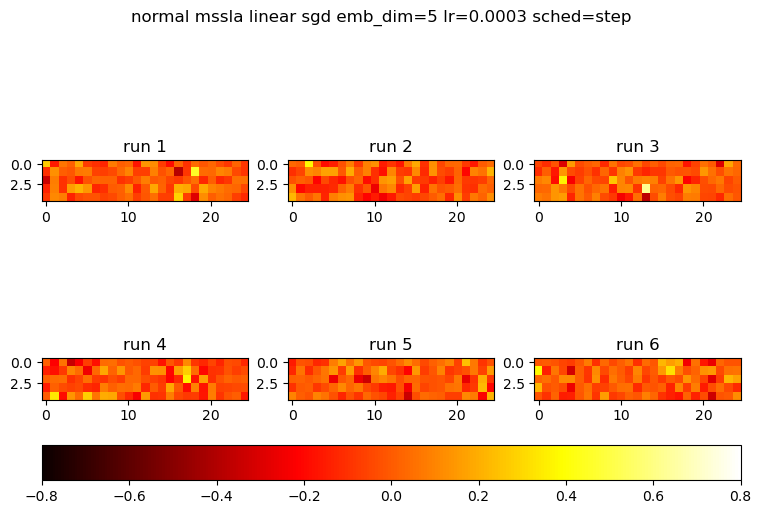

array([[0.93110001, 0.56220001, 0.69480002, 0.98549998, 0.55430001],
       [0.7604    , 0.67070001, 0.75050002, 0.54519999, 0.55580002],
       [0.92839998, 0.5923    , 0.94849998, 0.62129998, 0.82620001],
       [0.83639997, 0.6839    , 0.68379998, 0.91420001, 0.58829999],
       [0.64069998, 0.86320001, 0.9465    , 0.52819997, 0.87720001],
       [0.94550002, 0.52170002, 0.53380001, 0.93790001, 0.97359997]])

In [8]:
dir = "./outputs/normal/mce_runs"
score_arr = get_feature_downstream_scores(dir)
clear_output()
show_weights(dir, plot_weights=True, subtitle=True, title=True)
score_arr

#### Hyperparam Tuning 
Include best performing above

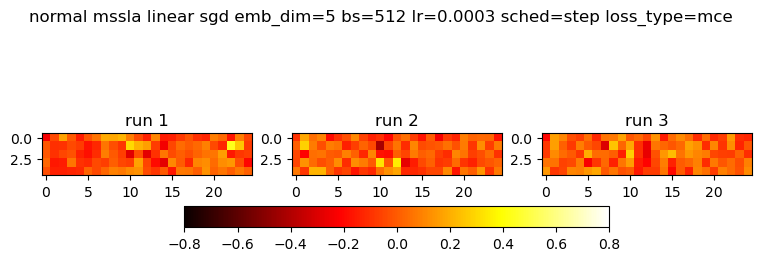

array([[0.53960001, 0.82059997, 0.78359997, 0.62050003, 0.75779998],
       [0.82700002, 0.67919999, 0.90609998, 0.56080002, 0.61619997],
       [0.64219999, 0.88819999, 0.85369998, 0.62870002, 0.59990001]])

In [12]:
# bs 512, n 2 ** 16
dirs = [
"./outputs/normal/mce_ht_runs/mssla_linear_sgd_emb_dim=5_bs=512_lr=0.0003_sched=step_loss_type=mce_run1",
"./outputs/normal/mce_ht_runs/mssla_linear_sgd_emb_dim=5_bs=512_lr=0.0003_sched=step_loss_type=mce_run2",
"./outputs/normal/mce_ht_runs/mssla_linear_sgd_emb_dim=5_bs=512_lr=0.0003_sched=step_loss_type=mce_run3",
]
score_arr = get_feature_downstream_scores(dirs)
clear_output()
show_weights(dirs, plot_weights=True, subtitle=True, title=True)
score_arr

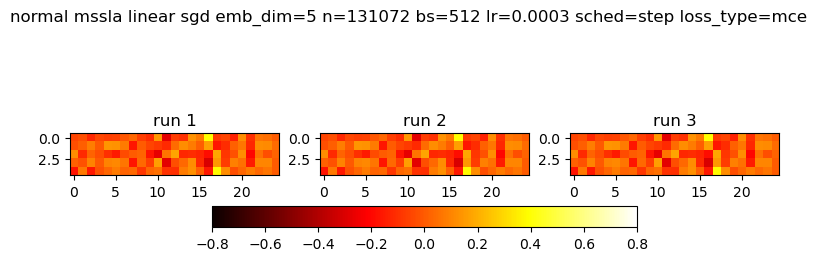

array([[0.68169999, 0.61059999, 0.87919998, 0.9831    , 0.56599998],
       [0.68260002, 0.60979998, 0.89289999, 0.97839999, 0.56269997],
       [0.68449998, 0.61519998, 0.87059999, 0.98009998, 0.56260002]])

In [21]:
# bs 512, n 2 ** 17 (constant num updates)
dirs = [
"./outputs/normal/mce_ht_runs/mssla_linear_sgd_emb_dim=5_n=131072_bs=512_lr=0.0003_sched=step_loss_type=mce_run1",
"./outputs/normal/mce_ht_runs/mssla_linear_sgd_emb_dim=5_n=131072_bs=512_lr=0.0003_sched=step_loss_type=mce_run1",
"./outputs/normal/mce_ht_runs/mssla_linear_sgd_emb_dim=5_n=131072_bs=512_lr=0.0003_sched=step_loss_type=mce_run1",
]
score_arr = get_feature_downstream_scores(dirs)
clear_output()
show_weights(dirs, plot_weights=True, subtitle=True, title=True)
score_arr

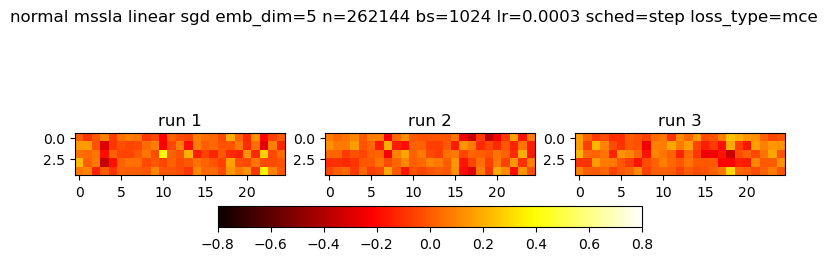

array([[0.91430002, 0.64819998, 0.76779997, 0.6196    , 0.85589999],
       [0.59909999, 0.8761    , 0.59259999, 0.94620001, 0.86699998],
       [0.54909998, 0.60869998, 0.67820001, 0.89310002, 0.56459999]])

In [22]:
# bs 1024, n 2 ** 18
dirs = [
"./outputs/normal/mce_ht_runs/mssla_linear_sgd_emb_dim=5_n=262144_bs=1024_lr=0.0003_sched=step_loss_type=mce_run1",
"./outputs/normal/mce_ht_runs/mssla_linear_sgd_emb_dim=5_n=262144_bs=1024_lr=0.0003_sched=step_loss_type=mce_run2",
"./outputs/normal/mce_ht_runs/mssla_linear_sgd_emb_dim=5_n=262144_bs=1024_lr=0.0003_sched=step_loss_type=mce_run3",
]
score_arr = get_feature_downstream_scores(dirs)
clear_output()
show_weights(dirs, plot_weights=True, subtitle=True, title=True)
score_arr

2 features, each 3 dimensions, embedding dim 2. varying batch size for MSSL MCE

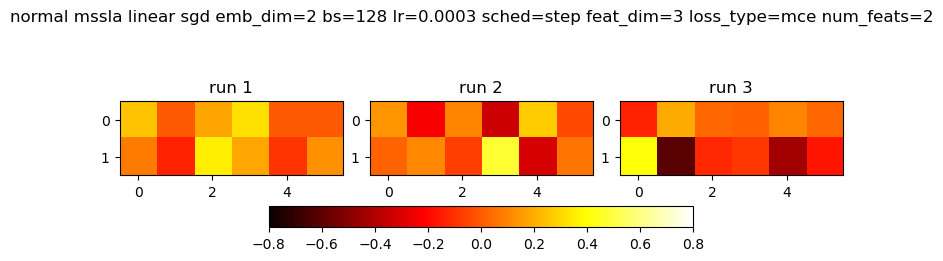

array([[0.7863    , 0.72530001],
       [0.51499999, 0.505     ],
       [0.81809998, 0.67739999]])

In [15]:
# bs 128
dirs = [
"./outputs/normal/mce_ht_runs/mssla_linear_sgd_emb_dim=2_bs=128_lr=0.0003_sched=step_feat_dim=3_loss_type=mce_num_feats=2_run1",
"./outputs/normal/mce_ht_runs/mssla_linear_sgd_emb_dim=2_bs=128_lr=0.0003_sched=step_feat_dim=3_loss_type=mce_num_feats=2_run2",
"./outputs/normal/mce_ht_runs/mssla_linear_sgd_emb_dim=2_bs=128_lr=0.0003_sched=step_feat_dim=3_loss_type=mce_num_feats=2_run3",
]
score_arr = get_feature_downstream_scores(dirs)
clear_output()
show_weights(dirs, plot_weights=True, subtitle=True, title=True)
score_arr

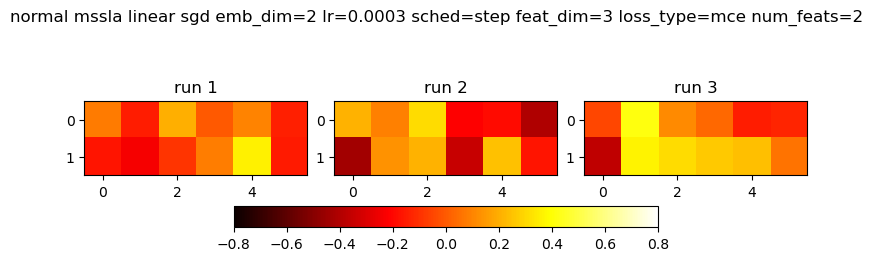

array([[0.8441    , 0.59399998],
       [0.5086    , 0.50849998],
       [0.89060003, 0.62110001]])

In [16]:
# bs 256
dirs = [
"./outputs/normal/mce_ht_runs/mssla_linear_sgd_emb_dim=2_lr=0.0003_sched=step_feat_dim=3_loss_type=mce_num_feats=2_run1",
"./outputs/normal/mce_ht_runs/mssla_linear_sgd_emb_dim=2_lr=0.0003_sched=step_feat_dim=3_loss_type=mce_num_feats=2_run2",
"./outputs/normal/mce_ht_runs/mssla_linear_sgd_emb_dim=2_lr=0.0003_sched=step_feat_dim=3_loss_type=mce_num_feats=2_run3",
]
score_arr = get_feature_downstream_scores(dirs)
clear_output()
show_weights(dirs, plot_weights=True, subtitle=True, title=True)
score_arr

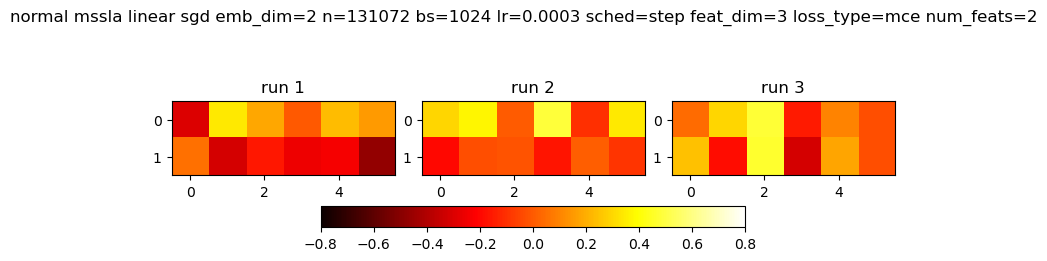

array([[0.4923    , 0.55470002],
       [0.875     , 0.63709998],
       [0.9285    , 0.63590002]])

In [14]:
# bs 1024
dirs = [
    "./outputs/normal/mce_ht_runs/mssla_linear_sgd_emb_dim=2_n=131072_bs=1024_lr=0.0003_sched=step_feat_dim=3_loss_type=mce_num_feats=2_run1",
    "./outputs/normal/mce_ht_runs/mssla_linear_sgd_emb_dim=2_n=131072_bs=1024_lr=0.0003_sched=step_feat_dim=3_loss_type=mce_num_feats=2_run2",
    "./outputs/normal/mce_ht_runs/mssla_linear_sgd_emb_dim=2_n=131072_bs=1024_lr=0.0003_sched=step_feat_dim=3_loss_type=mce_num_feats=2_run3",
]
score_arr = get_feature_downstream_scores(dirs)
clear_output()
show_weights(dirs, plot_weights=True, subtitle=True, title=True)
score_arr

### Norm Mean Diff Loss
$\| E_{x, x' \sim p_+} [f(x)f(x)^\top - f(x')f(x')^\top]\|_F^2$

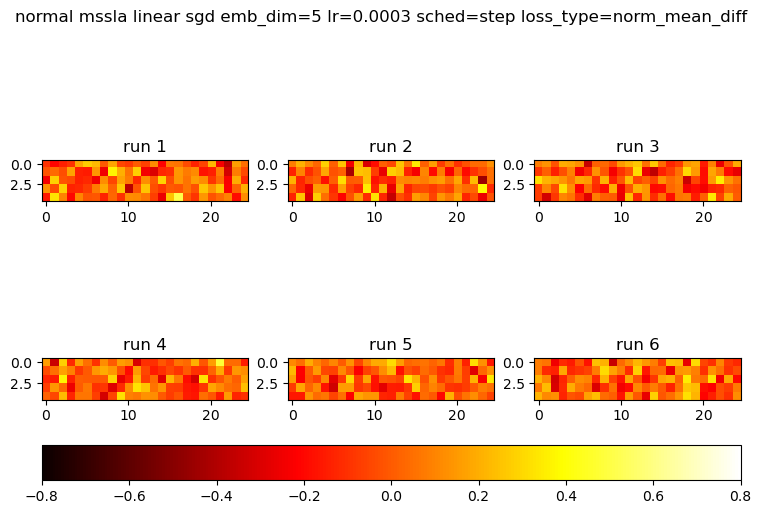

array([[0.5851    , 0.63150001, 0.61110002, 0.65079999, 0.80260003],
       [0.66659999, 0.67150003, 0.64359999, 0.58399999, 0.61650002],
       [0.66339999, 0.65499997, 0.68269998, 0.59820002, 0.67019999],
       [0.69400001, 0.75419998, 0.6627    , 0.68129998, 0.57279998],
       [0.62559998, 0.67339998, 0.70450002, 0.6868    , 0.56489998],
       [0.59820002, 0.59960002, 0.67570001, 0.62080002, 0.55559999]])

In [9]:
dir = "./outputs/normal/norm_mean_diff_runs"
score_arr = get_feature_downstream_scores(dir)
clear_output()
show_weights(dir, plot_weights=True, subtitle=True, title=True)
score_arr

#### Hyperparam Tuning 
Include best performing above

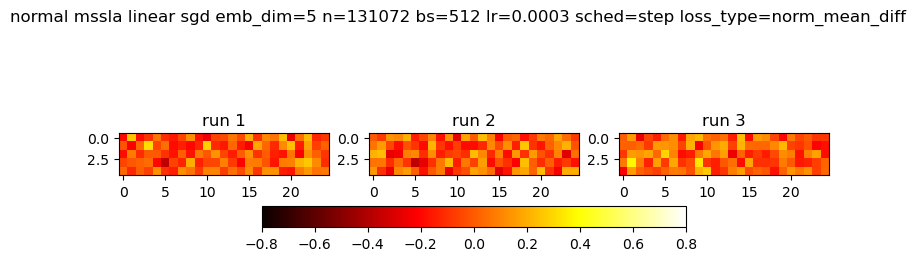

array([[0.66790003, 0.63419998, 0.65930003, 0.65429997, 0.68540001],
       [0.57740003, 0.67919999, 0.65439999, 0.58999997, 0.6904    ],
       [0.62180001, 0.6056    , 0.67189997, 0.57789999, 0.67430001]])

In [18]:
# varying batch size: bs 512
dirs = [
"./outputs/normal/nmd_ht_runs/mssla_linear_sgd_emb_dim=5_n=131072_bs=512_lr=0.0003_sched=step_loss_type=norm_mean_diff_run1",
"./outputs/normal/nmd_ht_runs/mssla_linear_sgd_emb_dim=5_n=131072_bs=512_lr=0.0003_sched=step_loss_type=norm_mean_diff_run2",
"./outputs/normal/nmd_ht_runs/mssla_linear_sgd_emb_dim=5_n=131072_bs=512_lr=0.0003_sched=step_loss_type=norm_mean_diff_run3",
]
score_arr = get_feature_downstream_scores(dirs)
clear_output()
show_weights(dirs, plot_weights=True, subtitle=True, title=True)
score_arr

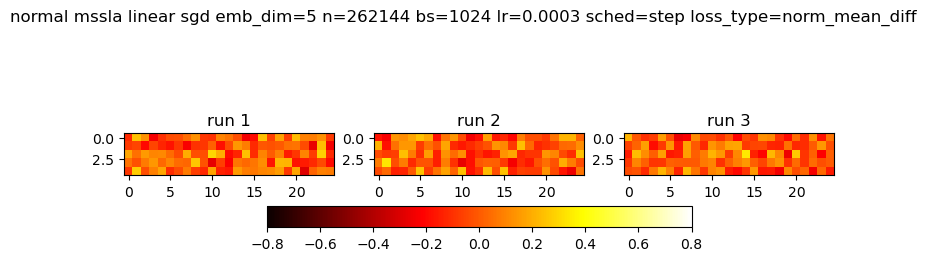

array([[0.64050001, 0.66289997, 0.72180003, 0.67159998, 0.60689998],
       [0.61220002, 0.62169999, 0.62260002, 0.67259997, 0.62260002],
       [0.67659998, 0.60820001, 0.676     , 0.64950001, 0.6372    ]])

In [19]:
# varying batch size: bs 1024
dirs = [
"./outputs/normal/nmd_ht_runs/mssla_linear_sgd_emb_dim=5_n=262144_bs=1024_lr=0.0003_sched=step_loss_type=norm_mean_diff_run1",
"./outputs/normal/nmd_ht_runs/mssla_linear_sgd_emb_dim=5_n=262144_bs=1024_lr=0.0003_sched=step_loss_type=norm_mean_diff_run2",
"./outputs/normal/nmd_ht_runs/mssla_linear_sgd_emb_dim=5_n=262144_bs=1024_lr=0.0003_sched=step_loss_type=norm_mean_diff_run3",
]
score_arr = get_feature_downstream_scores(dirs)
clear_output()
show_weights(dirs, plot_weights=True, subtitle=True, title=True)
score_arr

In [ ]:
# varying batch size: bs 2048
dirs = [

]
score_arr = get_feature_downstream_scores(dirs)
clear_output()
show_weights(dirs, plot_weights=True, subtitle=True, title=True)
score_arr

### Mean Norm Diff Loss
$E_{x, x' \sim p_+}[\| f(x)f(x)^\top - f(x')f(x')^\top\|_F^2]$

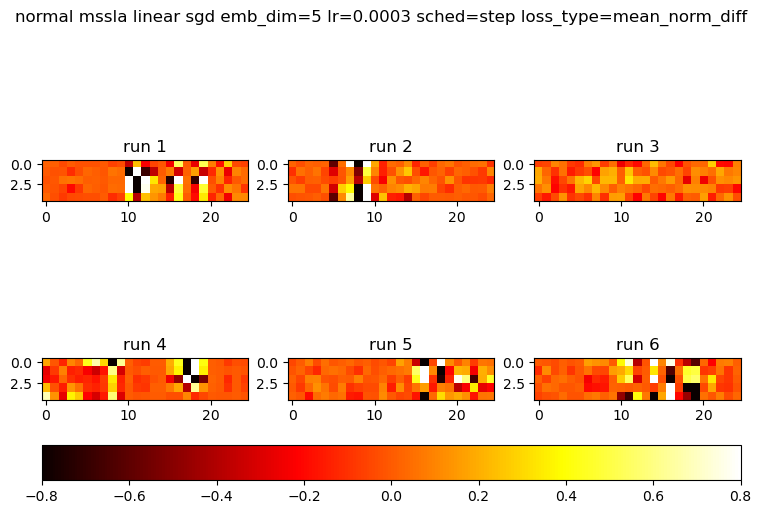

array([[0.67030001, 0.63169998, 0.97930002, 0.98329997, 0.97280002],
       [0.54720002, 0.995     , 0.97549999, 0.57359999, 0.54000002],
       [0.6789    , 0.61720002, 0.65750003, 0.61220002, 0.67379999],
       [0.98710001, 0.99080002, 0.61860001, 0.9928    , 0.53640002],
       [0.63520002, 0.54579997, 0.58410001, 0.98839998, 0.98890001],
       [0.54100001, 0.76730001, 0.99309999, 0.98830003, 0.74580002]])

In [10]:
dir = "./outputs/normal/mean_norm_diff_runs"
score_arr = get_feature_downstream_scores(dir)
clear_output()
show_weights(dir, plot_weights=True, subtitle=True, title=True)
score_arr

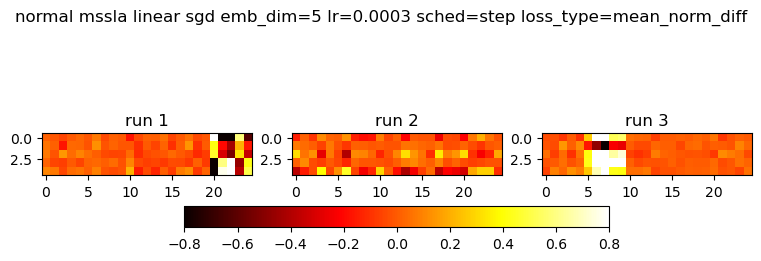

array([[0.54720002, 0.5772    , 0.6408    , 0.64600003, 0.97250003],
       [0.62269998, 0.64099997, 0.63239998, 0.62089998, 0.68889999],
       [0.82980001, 0.99379998, 0.58429998, 0.56110001, 0.69940001]])

In [11]:
# new version with centered embeddings
dir = "./outputs/normal/mean_norm_diff_runs/centered"
score_arr = get_feature_downstream_scores(dir)
clear_output()
show_weights(dir, plot_weights=True, subtitle=True, title=True)
score_arr

#### Hyperparam Tuning 
Include best performing above

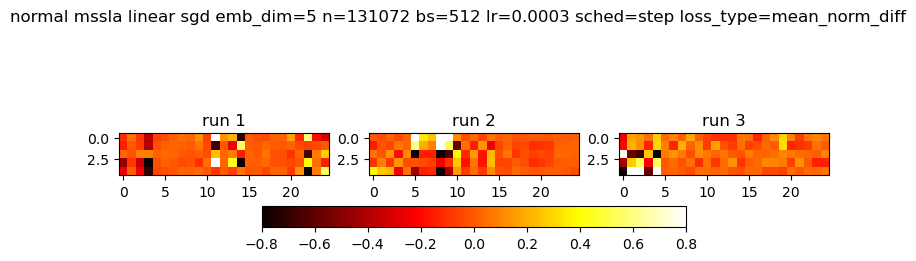

array([[0.98320001, 0.6124    , 0.97939998, 0.50260001, 0.98150003],
       [0.9648    , 0.97899997, 0.96640003, 0.63950002, 0.54280001],
       [0.99159998, 0.68150002, 0.56400001, 0.84680003, 0.59469998]])

In [20]:
# varying batch size: bs 512
dirs = [
"./outputs/normal/mnd_ht_runs/mssla_linear_sgd_emb_dim=5_n=131072_bs=512_lr=0.0003_sched=step_loss_type=mean_norm_diff_run1",
"./outputs/normal/mnd_ht_runs/mssla_linear_sgd_emb_dim=5_n=131072_bs=512_lr=0.0003_sched=step_loss_type=mean_norm_diff_run2",
"./outputs/normal/mnd_ht_runs/mssla_linear_sgd_emb_dim=5_n=131072_bs=512_lr=0.0003_sched=step_loss_type=mean_norm_diff_run3",
]
score_arr = get_feature_downstream_scores(dirs)
clear_output()
show_weights(dirs, plot_weights=True, subtitle=True, title=True)
score_arr

In [ ]:
# varying batch size: bs 1024
dirs = [

]
score_arr = get_feature_downstream_scores(dirs)
clear_output()
show_weights(dirs, plot_weights=True, subtitle=True, title=True)
score_arr

## Symmetric MSSL (Normal):

### Mean Norm Diff

In [56]:
rd = torch.load(os.path.join("./outputs/normal/symmetric/mnd_ht/mssls_linear_sgd_emb_dim=5_lr=0.0003_sched=step_loss_type=mean_norm_diff_run3", "run_dict"))
weights = rd['model_weights']['weight']

weights may be unstable - runs 1, 3 have normal weights, run 2 has ridiculous weights

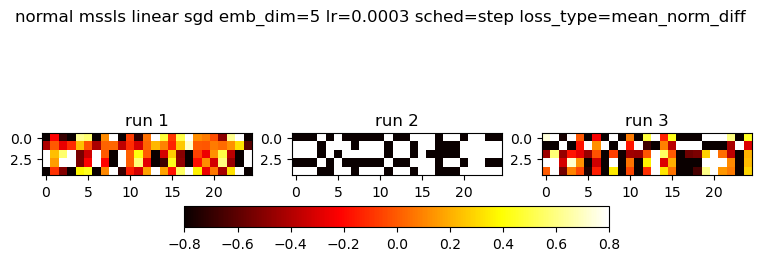

/Users/admin/opt/anaconda3/envs/env_pytorch/lib/python3.9/site-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


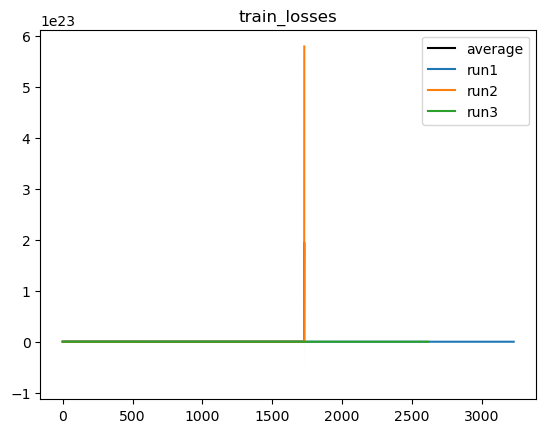

array([[0.55070001, 0.69400001, 0.69300002, 0.70990002, 0.65350002],
       [0.57609999, 0.52090001, 0.4314    , 0.56400001, 0.56099999],
       [0.65499997, 0.57380003, 0.62840003, 0.63510001, 0.6936    ]])

In [26]:
# symmetric bs 256
dirs = [
"./outputs/normal/symmetric/mnd_ht/mssls_linear_sgd_emb_dim=5_lr=0.0003_sched=step_loss_type=mean_norm_diff_run1",
"./outputs/normal/symmetric/mnd_ht/mssls_linear_sgd_emb_dim=5_lr=0.0003_sched=step_loss_type=mean_norm_diff_run2",
"./outputs/normal/symmetric/mnd_ht/mssls_linear_sgd_emb_dim=5_lr=0.0003_sched=step_loss_type=mean_norm_diff_run3",
]
# score_arr = get_feature_downstream_scores(dirs)
clear_output()
show_weights(dirs, plot_weights=True, subtitle=True, title=True)
plot_metrics(dirs, plotall=True)
# score_arr

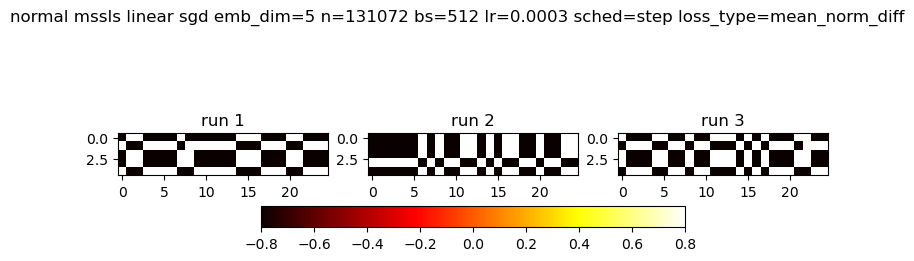

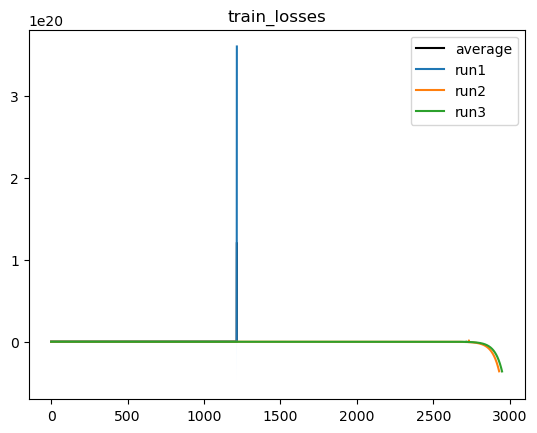

array([[0.59189999, 0.65689999, 0.48030001, 0.45460001, 0.48339999],
       [0.48280001, 0.5079    , 0.49779999, 0.50480002, 0.54629999],
       [0.66409999, 0.57459998, 0.5323    , 0.65090001, 0.55320001]])

In [45]:
# symmetric bs 512 n 2 ** 17
dirs = [
"./outputs/normal/symmetric/mnd_ht/mssls_linear_sgd_emb_dim=5_n=131072_bs=512_lr=0.0003_sched=step_loss_type=mean_norm_diff_run1",
"./outputs/normal/symmetric/mnd_ht/mssls_linear_sgd_emb_dim=5_n=131072_bs=512_lr=0.0003_sched=step_loss_type=mean_norm_diff_run2",
"./outputs/normal/symmetric/mnd_ht/mssls_linear_sgd_emb_dim=5_n=131072_bs=512_lr=0.0003_sched=step_loss_type=mean_norm_diff_run3",
]
score_arr = get_feature_downstream_scores(dirs)
clear_output()
show_weights(dirs, plot_weights=True, subtitle=True, title=True)
plot_metrics(dirs, plotall=True)
score_arr

### Norm Mean Diff

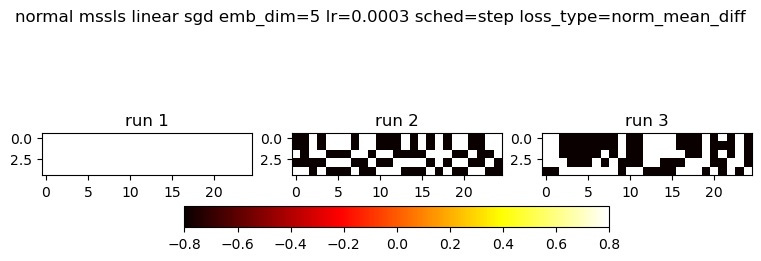

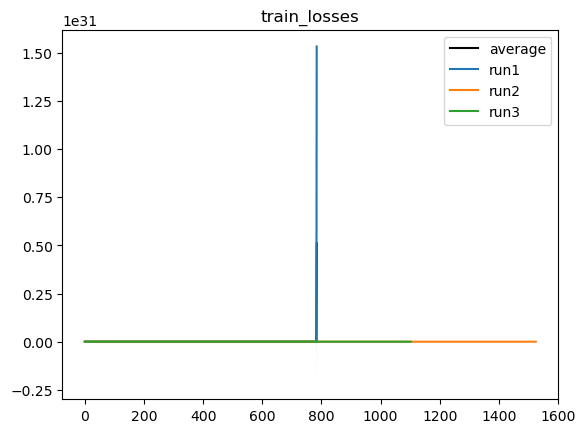

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.47999999, 0.56239998, 0.54799998, 0.44850001, 0.5219    ],
       [0.52520001, 0.5402    , 0.4639    , 0.54030001, 0.3935    ]])

In [25]:
# symmetric bs 256
dirs = [
"./outputs/normal/symmetric/nmd_ht/mssls_linear_sgd_emb_dim=5_lr=0.0003_sched=step_loss_type=norm_mean_diff_run1",
"./outputs/normal/symmetric/nmd_ht/mssls_linear_sgd_emb_dim=5_lr=0.0003_sched=step_loss_type=norm_mean_diff_run2",
"./outputs/normal/symmetric/nmd_ht/mssls_linear_sgd_emb_dim=5_lr=0.0003_sched=step_loss_type=norm_mean_diff_run3",
]
score_arr = get_feature_downstream_scores(dirs)
clear_output()
show_weights(dirs, plot_weights=True, subtitle=True, title=True)
plot_metrics(dirs, plotall=True)
score_arr

In [40]:
run = "./outputs/normal/symmetric/nmd_ht/mssls_linear_sgd_emb_dim=5_lr=0.0003_sched=step_loss_type=norm_mean_diff_run1"
rd = torch.load(os.path.join(run, 'run_dict'))

dict_keys(['model_weights', 'data', 'optim', 'args', 'essential_args', 'train_losses', 'gradient_norms'])

In [41]:
rd['model_weights']

OrderedDict([('weight',
              tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                       nan],
                      [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                       nan],
                      [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                       nan],
                      [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                       nan],
                      [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
                       nan]])),
             ('bias', tensor([nan, nan, nan, nan, nan]))])

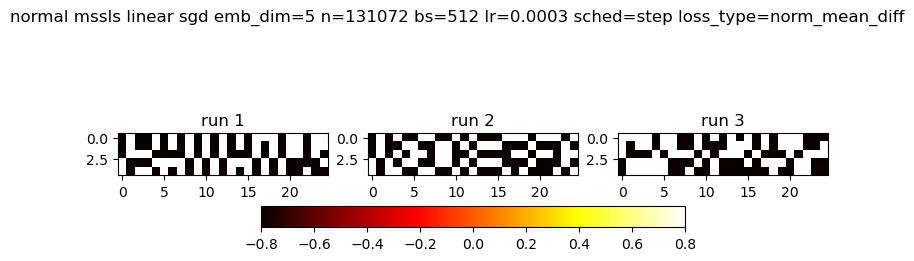

/Users/admin/opt/anaconda3/envs/env_pytorch/lib/python3.9/site-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


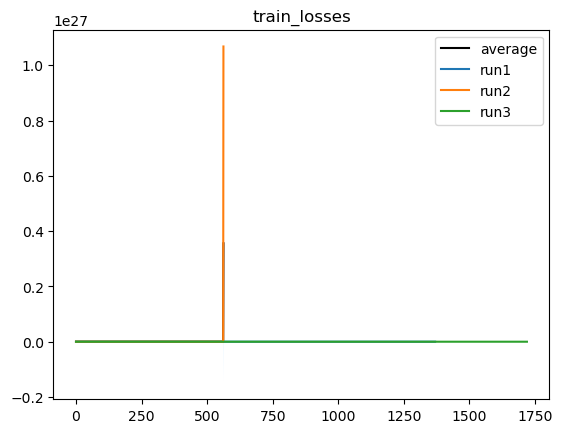

In [42]:
dirs = [
"./outputs/normal/symmetric/nmd_ht/mssls_linear_sgd_emb_dim=5_n=131072_bs=512_lr=0.0003_sched=step_loss_type=norm_mean_diff_run1",
"./outputs/normal/symmetric/nmd_ht/mssls_linear_sgd_emb_dim=5_n=131072_bs=512_lr=0.0003_sched=step_loss_type=norm_mean_diff_run2",
"./outputs/normal/symmetric/nmd_ht/mssls_linear_sgd_emb_dim=5_n=131072_bs=512_lr=0.0003_sched=step_loss_type=norm_mean_diff_run3",
]
# score_arr = get_feature_downstream_scores(dirs)
# clear_output()
show_weights(dirs, plot_weights=True, subtitle=True, title=True)
plot_metrics(dirs, plotall=True)
# score_arr

/Users/admin/opt/anaconda3/envs/env_pytorch/lib/python3.9/site-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


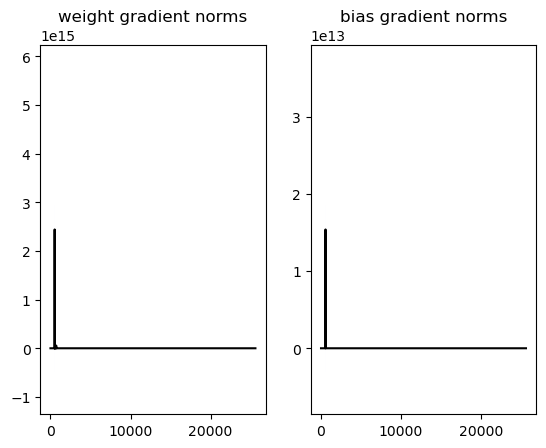

In [44]:
plot_metrics(dirs, 'gradient_norms')

In [30]:
d = "./outputs/normal/symmetric/nmd_ht/mssls_linear_sgd_emb_dim=5_n=131072_bs=512_lr=0.0003_sched=step_loss_type=norm_mean_diff_run3"
rd = torch.load(os.path.join(d, 'run_dict'))


dict_keys(['model_weights', 'data', 'optim', 'args', 'essential_args', 'train_losses', 'gradient_norms'])

In [39]:
rd['train_losses'][1655:1730]

[-9.096628582741967e+18,
 -9.296668780497207e+18,
 -9.5011009774496e+18,
 -9.710034575006106e+18,
 -9.923559733120205e+18,
 -1.014178860197793e+19,
 -1.036480584397462e+19,
 -1.05927313058777e+19,
 -1.0825669441291813e+19,
 -1.1063731300891361e+19,
 -1.1307024636815868e+19,
 -1.1555672594367644e+19,
 -1.180978292568621e+19,
 -1.206948317412039e+19,
 -1.2334895385460867e+19,
 -1.2606144904033206e+19,
 -1.2883357074162975e+19,
 -1.3166668235292017e+19,
 -1.3456209229304037e+19,
 -1.375211199759437e+19,
 -1.4054531571302531e+19,
 -1.4363593294754087e+19,
 -1.467944890055367e+19,
 -1.500226221593382e+19,
 -1.5332168480824754e+19,
 -1.5669322726365987e+19,
 -1.601388768027843e+19,
 -1.6366044761980666e+19,
 -1.6725945704077328e+19,
 -1.709374773673119e+19,
 -1.7469639975942226e+19,
 -1.7853801642105766e+19,
 -1.8246420751710159e+19,
 -1.864766223149957e+19,
 -1.9057722894055375e+19,
 -1.9476817144144986e+19,
 -1.990511650558234e+19,
 -2.0342832084599964e+19,
 -2.0790181584500163e+19,
 -2.12

In [ ]:
# how are we getting such a negative loss..?

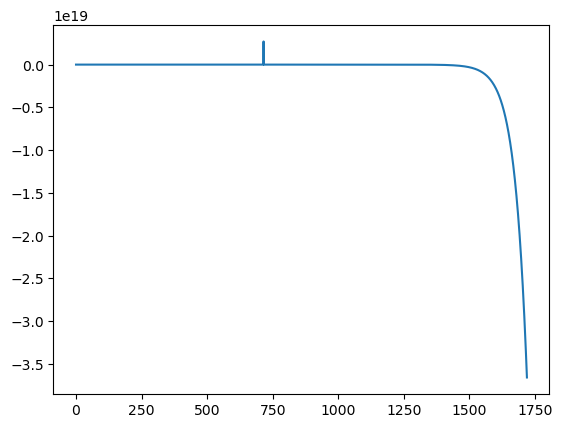

In [37]:
plt.plot(rd['train_losses'])

## Add Augmentations 
i.e k unaugmented dimensions, remaining d-k dims split into two. sample vector $\tau \sim U(0, 1)^{(d-k)/2}$ and add to one half, subtract from the other.